<a href="https://colab.research.google.com/github/a01634928/TC3006C_101_A01634928/blob/main/%5Cmodulo_1%5Ctecnicas_de%20procesamiento_de_datos_para_el_analisis%20_estadistico%5Clos_salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data processing techniques for statistical analysis and model building
Student: Jesús David Núñez Rodríguez A01634928  
  
### problem description:  


Identify the conditions that make a person specialized in data analysis have a better, salary according to the database provided by Kaggle, in a sample of people who are dedicated to data analysis in different parts of the world.  

Questions:  
What are the best paid jobs?  
The salary has increase over time?  


In [9]:
#@title
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm

#### Preview of the data:

In [10]:
#@title
df = pd.read_csv('/content/drive/MyDrive/AaTecM/semestre_7mo/Estadistica/r_scripts/ds_salaries.csv') #load data frame from  ds_salaries
df = df.drop(columns = 'Unnamed: 0') #drop index because is not useful
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Exploratory phase of data base  
There is 607 rows wich will be consider n  
#### **Types of atributes:**  
Categorical (nominal):  
Categorical (ordinal): work_year, experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size  
Numeric: salary, salary_in_usd, remote_ratio

In [11]:
#@title
df.describe(include = 'all')
# Describe function gives measures of central tendency and measures of dispersion

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


By a quick review of the metrics, it can be said that most of the jobs in df are from people working in US companies, because the most common company location (up to 58%) is in US. Furthermore the **mean salary is $112,297.00**

In [12]:
import plotly.express as px
fig = px.histogram(df, x="salary_in_usd", marginal="box", nbins = 50)
fig.show()

The right tail is considerably longer, also is a right-skewed (asymmetric) distribution due to the outliers that pull the mean to the right.

In [13]:
import plotly.express as px
fig = px.histogram(df, x="remote_ratio", marginal="box", nbins = 50)
fig.show()

Its important to notice that remote ratio is a numeric atribute but behave like a categorical, would be useful validate with the source of the data the nature of it.  
  
check for NaN values in df to avoid inconsistences in further analisis

In [14]:
df.isna().sum() #check for NaN values in df to avoid inconsistences in further analisis

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Frecuency of categorical variables

In [15]:
print(df['experience_level'].value_counts())
print(df['job_title'].value_counts())
print(df['company_location'].value_counts())

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Da

# data preprocesing  


In [16]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['salary_in_usd'])) < 3)] # remove outliers based in salary_in_usd
fig = px.histogram(df, x="salary_in_usd", marginal="box", nbins = 50)
fig.show()

Past procedure helped to normalize the data for a beter analisis. however the df still shows bias to the right but with shorter tails.

In [17]:
print('The new size of df(after drop outliers) is: ' + str(df['salary_in_usd'].size))

The new size of df(after drop outliers) is: 598


The atributes to analize will be:
As inpedendent: experience_level, job_title, company_location  
As dependent: salary_in_usd  

Salary and salary currency will be drop due that salary_in_usd standarize the income in a unique scala.
Remote ratio will be drop for its unsure nature


In [18]:
df = df.drop(columns = ['salary', 'salary_currency', 'remote_ratio'])

# Does the level of experience influence the salary?
### H0: The experience groups have equal mean
### H1: At least one group introduce significance to displace the mean
dict for experience map: 0 = 'EN', 1 = 'EX', 2 = 'MI', 3 = 'SE'

In [19]:
#This cell creates map columns to process categorical variables.
from sklearn.preprocessing import LabelEncoder
cat_cols = ['experience_level','job_title','company_location']
for var in cat_cols:
    var_col = var + '_map'
    number = LabelEncoder()
    #encoder[var] = preprocessing.LabelEncoder()
    df[var_col] = number.fit_transform(df[var].astype('str'))
    #df[var] = encoder[var].inverse_transform(df[var])
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size,experience_level_map,job_title_map,company_location_map
0,2020,MI,FT,Data Scientist,79833,DE,DE,L,2,21,12
1,2020,SE,FT,Machine Learning Scientist,260000,JP,JP,S,3,40,29
2,2020,SE,FT,Big Data Engineer,109024,GB,GB,M,3,7,18
3,2020,MI,FT,Product Data Analyst,20000,HN,HN,S,2,46,20
4,2020,SE,FT,Machine Learning Engineer,150000,US,US,L,3,37,48


In [20]:
df['salary_in_usd_est_esc']=(df['salary_in_usd']-df['salary_in_usd'].mean())/df['salary_in_usd'].std() #estandar escalation (X-X_)/S

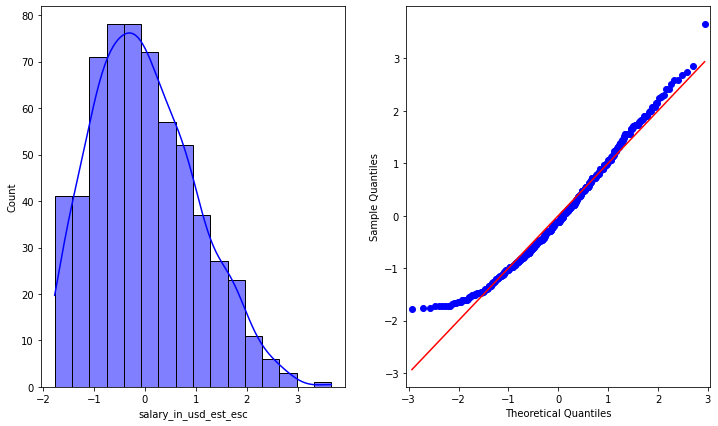

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(df['salary_in_usd_est_esc']).qqplot(line='s', ax=ax[1]);
sns.histplot(df['salary_in_usd_est_esc'],kde=True, color ='blue',ax=ax[0])
  

Soft tails distribution, high curtosis, leptocurtic distribution.

In [22]:
df.groupby('experience_level_map').agg(['mean', 'std'])

work_year            salary_in_usd                \
                             mean       std           mean           std   
experience_level_map                                                       
0                     2021.011364  0.686392   61643.318182  44395.541126   
1                     2021.521739  0.593109  167095.347826  65874.574937   
2                     2021.285714  0.708314   82953.142857  48222.337602   
3                     2021.628159  0.598005  135797.263538  51162.122770   

                     job_title_map            company_location_map             \
                              mean        std                 mean        std   
experience_level_map                                                            
0                        19.375000  11.439308            29.511364  16.312321   
1                        19.869565   8.976253            36.652174  16.305628   
2                        20.300000  10.183038            31.395238  16.128698   
3                        20.350181   9.812930            40.862816  14.292593   

                     salary_in_usd_est_esc            
                                      mean       std  
experience_level_map                                  
0                                -0.775471  0.750247  
1                                 1.006580  1.113225  
2                                -0.415353  0.814917  
3                                 0.477668  0.864597

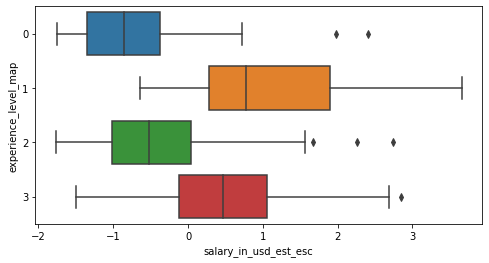

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="experience_level_map", x="salary_in_usd_est_esc", data=df, orient = 'h')
#sns.swarmplot(x="experience_level_map", y="salary_in_usd_est_esc", data=df, color='black', alpha = 0.5, ax=ax);

In conclusion, h0 is not rejected, that could be validate by the confidences intervals graph.

In [24]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 30.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=10e0c1a6fb8e7c8f05b6a371be62a54ae11dcefbaf81face938be1fc110244e0
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=1d8e9653468a5bd04e5a527d14a4ae570655e149ac988923a75c7777ec6be740
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Validate normality in data

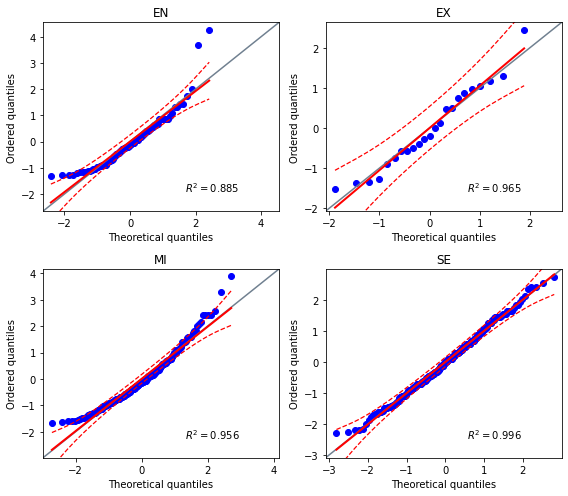

In [25]:
# qqplot graphs
import pingouin as pg
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(df.loc[df.experience_level_map==0, 'salary_in_usd_est_esc'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('EN')
pg.qqplot(df.loc[df.experience_level_map==1, 'salary_in_usd_est_esc'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('EX')
pg.qqplot(df.loc[df.experience_level_map==2, 'salary_in_usd_est_esc'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('MI')
pg.qqplot(df.loc[df.experience_level_map==3, 'salary_in_usd_est_esc'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('SE')
plt.tight_layout()

According to normality graph there ir normality in data, but is necesary to validate with complementary tests like Shapiro-Wilk and homocedasticity.

Normality test Shapiro-Wilk

In [28]:
# Normality test Shapiro-Wilk
pg.normality(data=df, dv='salary_in_usd_est_esc', group='experience_level_map')

,W,pval,normal
2,0.956378,0.000005,False
3,0.993931,0.331550,True
0,0.889819,0.000002,False
1,0.960074,0.464865,True


The result of Shapiro-Wilk test show that the data present inconsistencies in normality, in some.  

#### Homocedasticity test

In [29]:
# Homocedasticity test
pg.homoscedasticity(data=df, dv='salary_in_usd_est_esc', group='experience_level_map', method='levene')

,W,pval,equal_var
levene,3.596672,0.01345,False


The second red flag is that the data do not present homocedasticity  

### One-way ANOVA test

In [30]:
# One-way ANOVA test
pg.anova(data=df, dv='salary_in_usd_est_esc', between='experience_level_map', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,experience_level_map,175.653951,3,58.551317,82.543748,1.199071e-44,0.294228
1,Within,421.346049,594,0.709337,NaN,NaN,NaN


P-value is smaller than 0.05 wich is evidence to refuse the null hipotesis. Consequently, the experience level does affect the average income.  

#### Post-hoc Tukey test

In [31]:
# Post-hoc Tukey test
pg.pairwise_tukey(data=df, dv='salary_in_usd_est_esc', between='experience_level_map').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0,1,-0.775,1.007,-1.782,0.197,-9.035,0.000,-2.101
1,0,2,-0.775,-0.415,-0.360,0.107,-3.367,0.004,-0.426
2,0,3,-0.775,0.478,-1.253,0.103,-12.159,0.000,-1.485
3,1,2,1.007,-0.415,1.422,0.185,7.687,0.000,1.683
4,1,3,1.007,0.478,0.529,0.183,2.894,0.021,0.626
5,2,3,-0.415,0.478,-0.893,0.077,-11.588,0.000,-1.059


The groups 0,2 have a small diference in their means wich demostrate that these groups are similar,also 1,3 

# The salary has increase over time?

Description of data

In [32]:
df.groupby('work_year').agg(['mean', 'std'])

salary_in_usd               experience_level_map            \
                    mean           std                 mean       std   
work_year                                                               
2020        82775.884058  53887.352872             1.652174  1.148222   
2021        92860.436620  61531.282566             1.840376  1.108655   
2022       122825.943038  54286.303186             2.430380  0.853505   

          job_title_map            company_location_map             \
                   mean        std                 mean        std   
work_year                                                            
2020          21.811594  10.936011            30.797101  15.995937   
2021          22.070423  11.719188            32.887324  16.327326   
2022          18.531646   8.437385            38.677215  15.363849   

          salary_in_usd_est_esc            
                           mean       std  
work_year                                  
2020                  -0.418348  0.910651  
2021                  -0.247928  1.039827  
2022                   0.258464  0.917393

There is no need in do a deeper analisis, from 2020 to 2021 it has increase the salary in a 12%, and a 48% from 2020 to 2022.

# What are the best paid jobs?

In [33]:
df_job = df.groupby('job_title').agg(['mean', 'std'])

In [34]:
#@title
df_job['salary_in_usd', 'mean'].sort_values(ascending=False).head(7)

job_title
Principal Data Engineer     192500.000000
Principal Data Scientist    181782.833333
Data Architect              177873.909091
Analytics Engineer          175000.000000
Director of Data Science    173419.666667
Data Specialist             165000.000000
Head of Data                160162.600000
Name: (salary_in_usd, mean), dtype: float64

The top 7 of better paid jobs are the list from above

Conclusion, the data is not reliable because it do not present normality or homoscedasticity in the case of the variable of experience.